# Importing Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Data loading and Cleaning

In [133]:
train = pd.read_csv(r"C:\Users\Excellus\Downloads\free-ai-classes-in-every-city-hackathon-2023\Housing_dataset_train.csv")
test = pd.read_csv(r"C:\Users\Excellus\Downloads\free-ai-classes-in-every-city-hackathon-2023\Housing_dataset_test.csv")
sample = pd.read_csv(r"C:\Users\Excellus\Downloads\free-ai-classes-in-every-city-hackathon-2023\Sample_submission.csv")

In [134]:
train.head(15)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
6,7892,Kwara,Bungalow,NaN,4.0,4.0,2125789.778
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
8,555,Osun,Semi-detached duplex,NaN,1.0,2.0,1219453.877
9,3085,Kaduna,Penthouse,NaN,3.0,3.0,2710664.872


In [135]:
test.head(15)

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
5,9950,Edo,Detached duplex,6,4,5
6,1548,Niger,Flat,9,3,4
7,526,Anambra,Flat,1,1,4
8,6776,Niger,Flat,1,5,1
9,1851,Adamawa,Bungalow,4,1,4


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [137]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [138]:
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

# Dealing with nulls

 Data preprocessing

In [139]:
## filling nulls in numerical column to 0

train['bedroom'].fillna(0, inplace = True)
train['bathroom'].fillna(0, inplace = True)
train['parking_space'].fillna(0, inplace = True)

In [140]:
## removing nulls from location and title

train.dropna(inplace=True)

In [141]:
train.head(20)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,0.0,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,0.0,5.0,6.0,2600700.898
5,1733,Borno,Mansion,0.0,1.0,3.0,1341750.867
6,7892,Kwara,Bungalow,0.0,4.0,4.0,2125789.778
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
8,555,Osun,Semi-detached duplex,0.0,1.0,2.0,1219453.877
9,3085,Kaduna,Penthouse,0.0,3.0,3.0,2710664.872
10,12573,Ogun,Bungalow,1.0,2.0,6.0,1330213.036


In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 13998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10531 non-null  int64  
 1   loc            10531 non-null  object 
 2   title          10531 non-null  object 
 3   bedroom        10531 non-null  float64
 4   bathroom       10531 non-null  float64
 5   parking_space  10531 non-null  float64
 6   price          10531 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 658.2+ KB


# Data visualization

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'bedroom'}>],
       [<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'parking_space'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

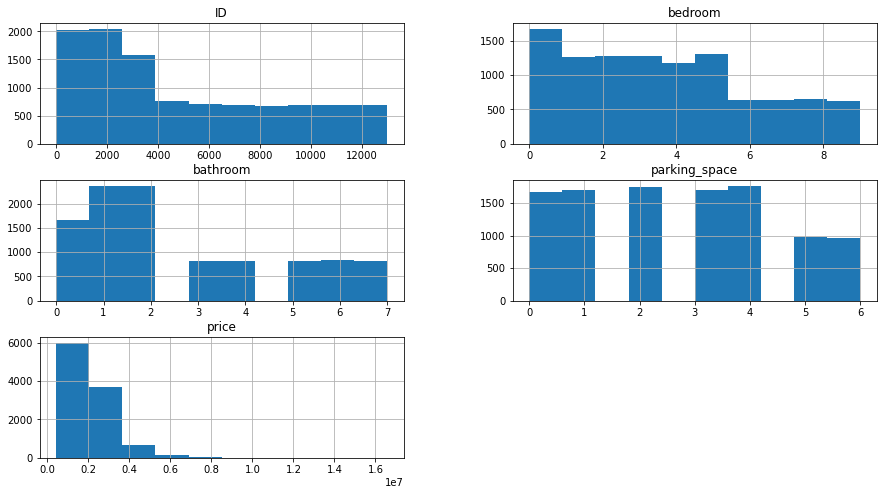

In [143]:
train.hist(figsize=(15, 8))

In [144]:
train.corr()

,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.182990,0.260584,0.124993,0.173519
bedroom,0.182990,1.000000,0.080583,0.007506,0.411628
bathroom,0.260584,0.080583,1.000000,0.054855,0.169865
parking_space,0.124993,0.007506,0.054855,1.000000,0.081973
price,0.173519,0.411628,0.169865,0.081973,1.000000


<AxesSubplot:>

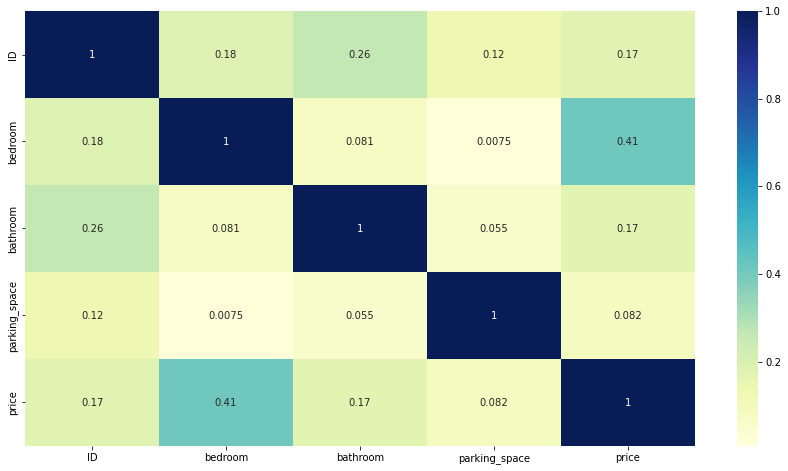

In [145]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')

# Feature Engineering

In [146]:
train["bedroom"] = train["bedroom"].astype(int)
train["bathroom"] = train["bathroom"].astype(int)
train["parking_space"] = train["parking_space"].astype(int)
train["title"] = train["title"].astype("category")
train["loc"] = train["loc"].astype("category")
test["bedroom"] = test["bedroom"].astype(int)
test["bathroom"] = test["bathroom"].astype(int)
test["parking_space"] = test["parking_space"].astype(int)
test["loc"] = test["loc"].astype("category")

In [147]:
train['title'].value_counts()

Flat                    1182
Apartment               1147
Townhouse               1139
Semi-detached duplex    1133
Mansion                 1125
Detached duplex         1115
Penthouse               1103
Bungalow                1102
Terrace duplex          1095
Cottage                  390
Name: title, dtype: int64

In [149]:
train = train.join(pd.get_dummies(train.title)).drop(['title'], axis=1)

In [150]:
test = test.join(pd.get_dummies(test.title)).drop(['title'], axis=1)

In [151]:
train['total_room'] = train['bedroom'] + train['bathroom']
test['total_room'] = test['bedroom'] + test['bathroom']

<AxesSubplot:>

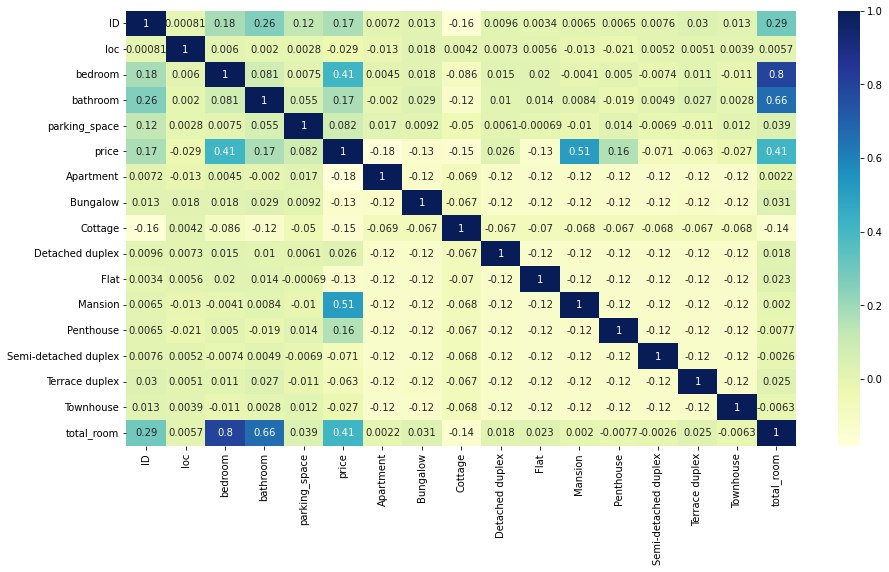

In [152]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')a

In [153]:
X = train.drop(['price'], axis = 1)
y = train['price']

In [154]:
X

,ID,loc,bedroom,bathroom,parking_space,Apartment,Bungalow,Cottage,Detached duplex,Flat,Mansion,Penthouse,Semi-detached duplex,Terrace duplex,Townhouse,total_room
0,3583,19,2,2,1,0,0,0,0,0,0,0,1,0,0,4
1,2748,27,0,2,4,1,0,0,0,0,0,0,0,0,0,2
3,2224,3,5,2,4,0,0,0,1,0,0,0,0,0,0,7
4,10300,21,0,5,6,0,0,0,0,0,0,0,0,1,0,5
5,1733,7,0,1,3,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13994,10477,33,8,1,6,0,0,0,1,0,0,0,0,0,0,9
13995,6175,11,0,7,0,0,1,0,0,0,0,0,0,0,0,7
13996,9704,17,0,7,5,1,0,0,0,0,0,0,0,0,0,7
13997,11190,30,8,6,5,0,1,0,0,0,0,0,0,0,0,14


In [160]:
reg = RandomForestRegressor()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X)
X_tests = scaler.fit_transform(test)

In [161]:
reg.fit(X, y)

RandomForestRegressor()

In [175]:
sub_file = pd.DataFrame({
    'ID': test.ID,
    'price': predd
})

sub_file.to_csv('submission.csv', index = False)

In [77]:
pred = ref.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [78]:
pred

array([2498977.82466256, 1325838.192049  , 1793095.33636026, ...,
       2121751.46139691, 2040982.13216232, 4184583.77208314])

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
forest = RandomForestRegressor()
param_grid = {
    'n_estimators' : [100, 200, 300],
    'min_samples_split' : [2, 4],
    'max_depth' : [None, 4, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [157]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=200)

In [158]:
predss = grid_search.best_estimator_.predict(test)

In [164]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
  Using cached xgboost-1.7.6-py3-none-win_amd64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
from xgboost import XGBRegressor

In [166]:
xgb = XGBRegressor()

In [167]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [168]:
predist = xgb.predict(test)

In [170]:
forest = XGBRegressor()
param_grid = {
    'depth' : [6, 8, 10],
    'learning_rate' : [0.01, 0.05, 0.1],
    'iterations' : [200, 150]
}
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X, y)

[20:56:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:56:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:56:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:56:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:56:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Paramete

[20:57:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:57:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.

[20:57:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Paramete

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [174]:
predd = grid_search.best_estimator_.predict(test)